In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%notebook inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("Customer_Behaviour.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.drop("User ID", axis=1, inplace=True)

In [8]:
sns.set_style("darkgrid")

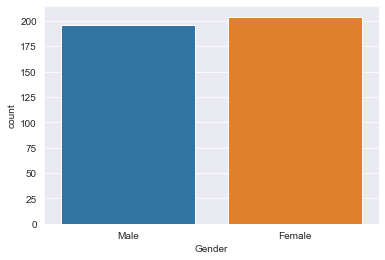

In [9]:
sns.countplot("Gender", data=df)

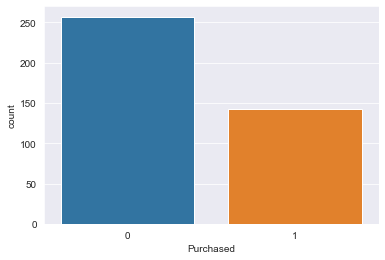

In [10]:
sns.countplot("Purchased", data=df)

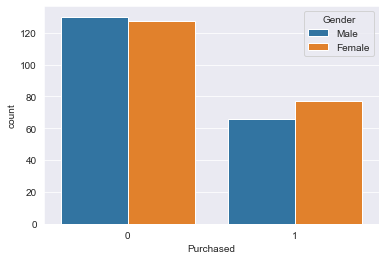

In [11]:
sns.countplot("Purchased", hue="Gender", data=df)

In [12]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

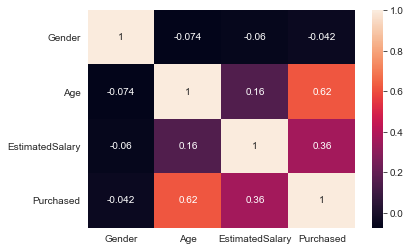

In [13]:
sns.heatmap(df.corr(), annot=True)

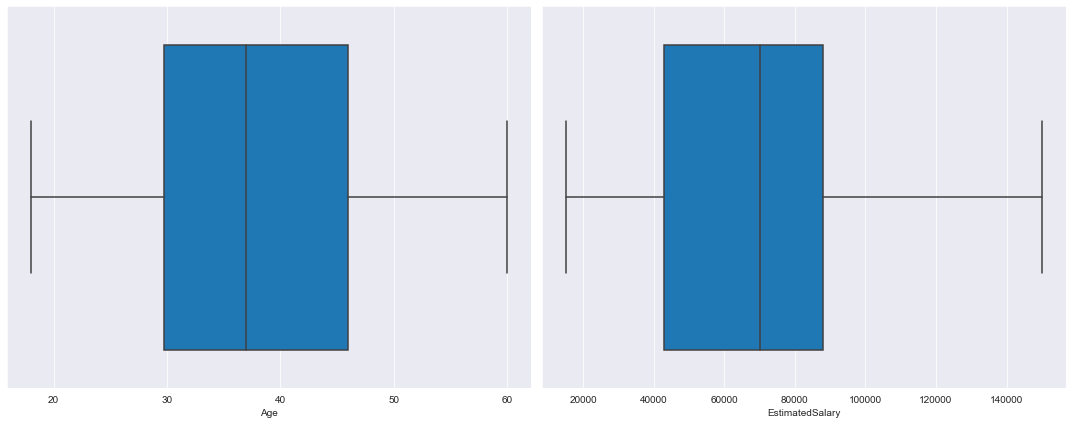

In [14]:
cols = ["Age", "EstimatedSalary"]
plt.figure(figsize=(15,6))

for i,col in enumerate(cols,1):
    plt.subplot(1,2, i)
    sns.boxplot(df[col], saturation=1)
    plt.tight_layout()

In [15]:
sc = StandardScaler()
X = df.drop("Purchased", axis=1)
y = df["Purchased"]
X= pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
models = {
    "                    Logistic Regression": LogisticRegression(),
    "                    K Nearest Neighbors": KNeighborsClassifier(n_neighbors=49),
    "                          Random Forest": RandomForestClassifier(max_depth=5),
    "                         SVM Classifier": SVC()
}

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                    Logistic Regression trained.
                    K Nearest Neighbors trained.
                          Random Forest trained.
                         SVM Classifier trained.


In [18]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                    Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.83333
Training Accuracy: 0.84643
------------------------------------------------------------


                    K Nearest Neighbors
------------------------------------------------------------
Testing Accuracy: 0.84167
Training Accuracy: 0.78929
------------------------------------------------------------


                          Random Forest
------------------------------------------------------------
Testing Accuracy: 0.92500
Training Accuracy: 0.93214
------------------------------------------------------------


                         SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.92500
Training Accuracy: 0.90357
------------------------------------------------------------




In [19]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [20]:
for name, model in models.items():
    evalModel(name, model)

                    Logistic Regression

Confusion Matrix
[[72  8]
 [12 28]]

Classifiation Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        80
           1       0.78      0.70      0.74        40

    accuracy                           0.83       120
   macro avg       0.82      0.80      0.81       120
weighted avg       0.83      0.83      0.83       120

                    K Nearest Neighbors

Confusion Matrix
[[78  2]
 [17 23]]

Classifiation Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        80
           1       0.92      0.57      0.71        40

    accuracy                           0.84       120
   macro avg       0.87      0.77      0.80       120
weighted avg       0.85      0.84      0.83       120

                          Random Forest

Confusion Matrix
[[73  7]
 [ 2 38]]

Classifiation Report
              precision    recall  f1-score   sup